In [81]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

In [18]:
mydata = pd.read_csv("../data/nancy_sus/transcripts/p2_output.csv", sep = "|")

In [19]:
mydata.head()

,result_2011_0001,result_2011_0002,result_2011_0003,result_2011_0009,result_2011_0014,result_2011_0008,result_2011_0010,result_2011_0007,result_2011_0004,result_2011_0013,...,result_2011_0093,result_2011_0089,result_2011_0084,result_2011_0098,result_2011_0100,result_2011_0087,result_2011_0097,result_2011_0092,result_2011_0090,Unnamed: 100
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [20]:
mydata_final = pd.melt(mydata)
mydata_final = mydata_final[:-1]


In [21]:
mydata_final['percentage'] = mydata_final['value'] * 100

In [22]:
n = 'p1'
mydata_final['Subject'] = n
mydata_final.head()

,variable,value,percentage,Subject
0,result_2011_0001,0.0,0.0,p1
1,result_2011_0002,0.0,0.0,p1
2,result_2011_0003,0.0,0.0,p1
3,result_2011_0009,0.0,0.0,p1
4,result_2011_0014,0.0,0.0,p1


In [23]:
#my_pupil_data = pd.read_csv("../experiments/nancy_sus/preprocessing/p1.csv")

#my_pupil_data.head()
#print(mydata_final['Subject'][0])

In [24]:
#search = mydata_final.variable.str.slice(12,17)
#for idx,value in enumerate(search):
#    results = my_pupil_data[my_pupil_data.STIMULI.str.contains(str(value))]
#    if not results.empty:
#        result = results.iloc[0]
#        system = results.SYSTEMS
        #mydata_final['SYSTEM'][idx] = system
#        df.iloc[idx].SYSTEM = system
        

In [25]:
with open("../data/nancy_sus/mappings.txt") as map:
        mappings = map.readlines()
        mappings = [y.strip() for y in mappings]

In [26]:
for idx,perm in enumerate(mappings):
            if n in perm:
                permutation = mappings[idx]
                perm = permutation.split(" ")
                perm_num = int(perm[1])
                correct_file = perm[2]
                systems = perm[3]
                systems = eval(systems)





In [27]:
nTrials = len(mydata_final)/len(systems)
system_trials = []
for system in systems:
    for i in range(0,int(nTrials)):
        system_trials.append(system.strip())  

mydata_final['System'] = system_trials

In [28]:
mydata_final.head()

,variable,value,percentage,Subject,System
0,result_2011_0001,0.0,0.0,p1,I
1,result_2011_0002,0.0,0.0,p1,I
2,result_2011_0003,0.0,0.0,p1,I
3,result_2011_0009,0.0,0.0,p1,I
4,result_2011_0014,0.0,0.0,p1,I


In [29]:
mydata_final.rename(columns={'variable': 'Stimuli', 'value': 'WER','percentage':'WER_%'}, inplace=True)


In [30]:
csv_filename ='test.csv'
mydata_final.to_csv(csv_filename, encoding='utf-8', index=True)

In [66]:
print("Generating exclude list for WER calculation ...")
print("Threshold to exlude is:",100 )

exclusions = mydata_final[mydata_final['WER_%'] == 100]
exclusion_list = exclusions.index.tolist()
exclusion_list = [16,17,18,19]
excluded_trials = n + "#"
for trial in exclusion_list:
    trial_index = trial + 1
    excluded_trials = excluded_trials + str(trial_index) + " "

with open("exclude_test.txt", 'a') as exclusions:
    exclusions.write(excluded_trials)
    exclusions.write("\n")
exclusion_list

Generating exclude list for WER calculation ...
Threshold to exlude is: 100


[16, 17, 18, 19]

In [56]:
mydata_final.drop(mydata_final.index[exclusion_list])

,Stimuli,WER,WER_%,Subject,System
0,result_2011_0001,0.0,0.0,p1,I
1,result_2011_0002,0.0,0.0,p1,I
2,result_2011_0003,0.0,0.0,p1,I
3,result_2011_0009,0.0,0.0,p1,I
4,result_2011_0014,0.0,0.0,p1,I
5,result_2011_0008,0.0,0.0,p1,I
6,result_2011_0010,0.0,0.0,p1,I
7,result_2011_0007,0.0,0.0,p1,I
8,result_2011_0004,0.0,0.0,p1,I
9,result_2011_0013,0.0,0.0,p1,I


In [57]:
with open("exclude_test.txt") as f:
            exclude_content = f.readlines()
            exclude_content = [x.strip() for x in exclude_content]


In [68]:
n = 'p1'
for idx,lists in enumerate(exclude_content):
                if n in lists:
                    exclude = exclude_content[idx]
                    exclude_trials = exclude.split("#")
                    excluded_trials = exclude_trials[1]
excluded_trials = excluded_trials.split(" ")
excluded_trials = [int(i) for i in excluded_trials]


In [69]:
mydata_final.drop(mydata_final.index[excluded_trials])

,Stimuli,WER,WER_%,Subject,System
0,result_2011_0001,0.0,0.0,p1,I
1,result_2011_0002,0.0,0.0,p1,I
2,result_2011_0003,0.0,0.0,p1,I
3,result_2011_0009,0.0,0.0,p1,I
4,result_2011_0014,0.0,0.0,p1,I
5,result_2011_0008,0.0,0.0,p1,I
6,result_2011_0010,0.0,0.0,p1,I
7,result_2011_0007,0.0,0.0,p1,I
8,result_2011_0004,0.0,0.0,p1,I
9,result_2011_0013,0.0,0.0,p1,I


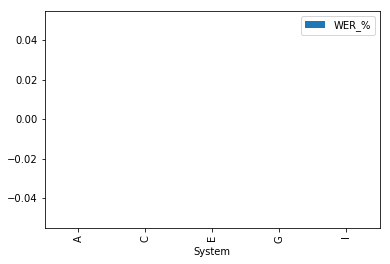

In [91]:
aggregate_all = mydata_final.groupby(['System'])['WER_%'].mean().reset_index()
aggregate_all.plot(x = 'System', y ='WER_%' , kind = 'bar' )
aggregate_all.plot?

In [203]:
threshold=20
exclusions = mydata_final[mydata_final['WER_%'] > 10]
exclusion_list = exclusions.index.tolist()
excluded_trials = n + " "
for trial in exclusion_list:
    trial_index = trial + 1
    excluded_trials = excluded_trials + str(trial_index) + " " 

#exclusion_list.append[excluded_trial]
excluded_trials
#exclusion_list

'p1 2 16 18 41 54 59 63 88 '

In [204]:
with open("../experiments/nancy_sus/preprocessing/exclude.txt") as exl:
        excluded = exl.readlines()
        excluded = [y.strip() for y in excluded]

In [205]:
excluded

['p1#2 16 18 41 54 59 63 88',
 'p2#',
 'p3#7 11 12 13 30 32 36 40 41 45 46 47 54 56 58 59 62 63 65 68 73 76 77 80 84 89 96 98']

In [208]:
exclude_trials = ''
for idx,lists in enumerate(excluded):
    if n in lists:
        exclude = excluded[idx]
        exclude_trials = exclude.split("#")
        exclude_trials = exclude_trials[1]

In [209]:
exclude_trials

'2 16 18 41 54 59 63 88'

In [214]:
trial_index = 59
if str(trial_index) not in exclude_trials:
    print("Not excluded")